# AI LAB ASSIGNMENT

## SUPRATIM NAG (CSE-AIML/22/57)

## Implementation of A* Search: Second heuristic/informed search algorithm using python

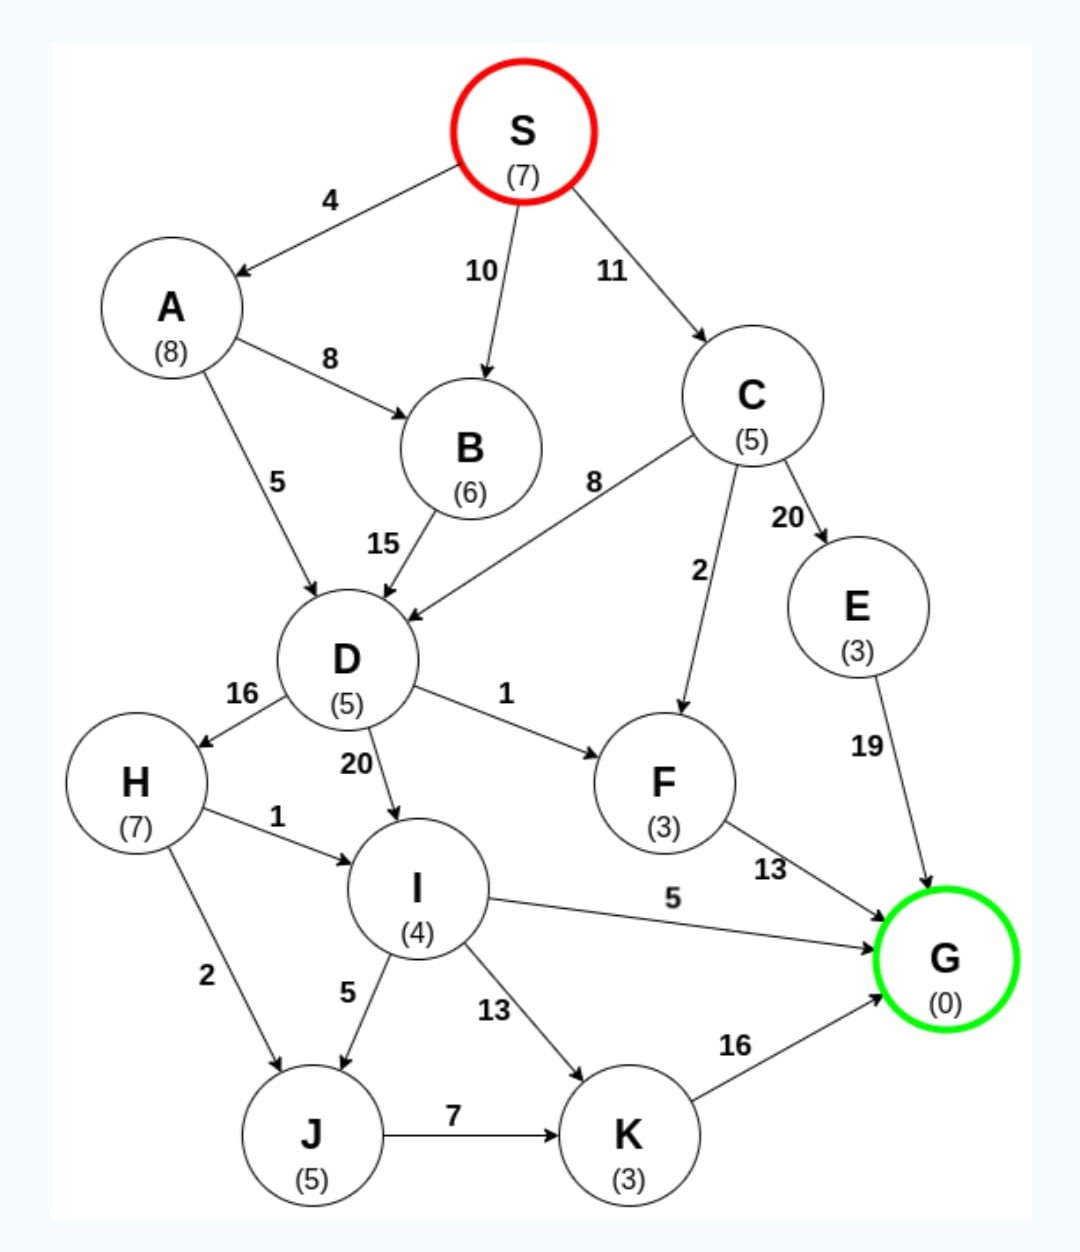

In [12]:
from IPython.display import Image
Image(filename="Graph04.jpg" ,width=200,height=200)

In [7]:
import heapq

In [9]:
# Define the graph (edges and their weights) and the heuristic values
graph = {
    'S': [('A', 4), ('B', 10), ('C', 11)],
    'A': [('D', 5),('B',8)],
    'B': [('D', 15)],
    'C': [('E', 20),('D',8),('F',2)],
    'D': [('H', 16), ('I', 20),('F',1)],
    'E': [('G', 19)],
    'F': [('G', 13)],
    'H': [('I', 1),('J',2)],
    'I': [('J', 5),('K',13)],
    'J': [('K', 7)],
    'K': [('G', 16)],
}
heuristics = {
    'S': 7,
    'A': 8,
    'B': 6,
    'C': 5,
    'D': 5,
    'E': 3,
    'F': 3,
    'G': 0,
    'H': 7,
    'I': 4,
    'J': 5,
    'K': 3,
}

In [10]:
def a_star(graph, start, goal, heuristics):
    # Priority queue to store (cost, current_node, path)
    pq = []
    heapq.heappush(pq, (0 + heuristics[start], 0, start, []))
    visited = set()

    while pq:
        # Pop the node with the lowest cost
        f_cost, g_cost, current, path = heapq.heappop(pq)
        
        # If we reached the goal, return the path and the total cost
        if current == goal:
            return path + [current], g_cost
        
        if current in visited:
            continue
        
        # Mark current node as visited
        visited.add(current)
        # Explore neighbors
        for neighbor, weight in graph.get(current, []):
            if neighbor not in visited:
                total_g_cost = g_cost + weight
                f_cost = total_g_cost + heuristics[neighbor]
                heapq.heappush(pq, (f_cost, total_g_cost, neighbor, path + [current]))

    return None, float('inf')  # If there's no path

In [11]:
# Example usage:
start_node = 'S'
goal_node = 'G'
path, total_cost = a_star(graph, start_node, goal_node, heuristics)

print(f"Shortest path from {start_node} to {goal_node}: {path}")
print(f"Total cost: {total_cost}")

Shortest path from S to G: ['S', 'A', 'D', 'F', 'G']
Total cost: 23
